In [1]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pywt
%matplotlib inline

In [2]:
for dirname, _, filenames in os.walk(r'C:\Users\przem\Desktop\bayern_players_recognition\model\dataset\alphonso-davies\alphonso-davies (9).jpg'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
img = cv2.imread(r'C:\Users\przem\Desktop\bayern_players_recognition\model\dataset\alphonso-davies\alphonso-davies (9).jpg')

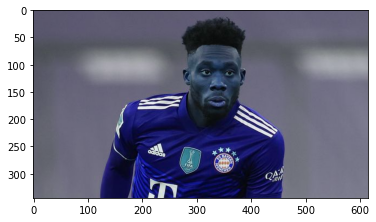

In [4]:
plt.imshow(img)

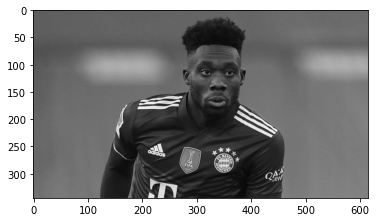

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

In [6]:
face_cascade = cv2.CascadeClassifier(r'C:\Users\przem\Desktop\bayern_players_recognition\model\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(r'C:\Users\przem\Desktop\bayern_players_recognition\model\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[268,  52, 145, 145]])

In [7]:
(x,y,w,h) = faces[0]
x,y,w,h

(268, 52, 145, 145)

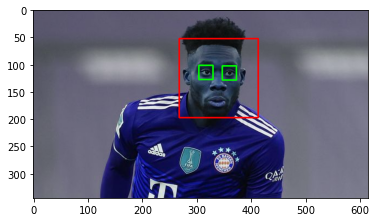

In [8]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

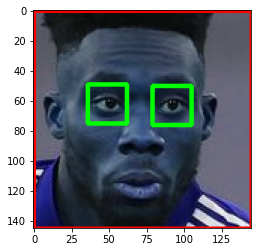

In [9]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [10]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [11]:
path_to_data = "C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset"
path_to_cropped_data = "C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\cropped"

In [12]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [13]:
img_dirs

['C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\alphonso-davies',
 'C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\benjamin-pavard',
 'C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\bouna-sarr',
 'C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\christian-fruechtl',
 'C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\corentin-tolisso',
 'C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\dayot-upamecano',
 'C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\eric-maxim-choupo-moting',
 'C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\jamal-musiala',
 'C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\joshua-kimmich',
 'C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\josip-stanisic',
 'C:\\Users\\przem\\Desktop\\bayern_players_recognition\\model\\dataset\\kingsley-coma

In [14]:
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)
os.mkdir(path_to_cropped_data)

In [15]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + "\\" + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".jpg"
            cropped_file_path = cropped_folder + "\\" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

alphonso-davies
Generating cropped images in folder:  C:\Users\przem\Desktop\bayern_players_recognition\model\cropped\alphonso-davies
benjamin-pavard
Generating cropped images in folder:  C:\Users\przem\Desktop\bayern_players_recognition\model\cropped\benjamin-pavard
bouna-sarr
Generating cropped images in folder:  C:\Users\przem\Desktop\bayern_players_recognition\model\cropped\bouna-sarr
christian-fruechtl
Generating cropped images in folder:  C:\Users\przem\Desktop\bayern_players_recognition\model\cropped\christian-fruechtl
corentin-tolisso
Generating cropped images in folder:  C:\Users\przem\Desktop\bayern_players_recognition\model\cropped\corentin-tolisso
dayot-upamecano
Generating cropped images in folder:  C:\Users\przem\Desktop\bayern_players_recognition\model\cropped\dayot-upamecano
eric-maxim-choupo-moting
Generating cropped images in folder:  C:\Users\przem\Desktop\bayern_players_recognition\model\cropped\eric-maxim-choupo-moting
jamal-musiala
Generating cropped images in fol

In [46]:
def w2d(img, mode='haar', level=1):
    imArray = img
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

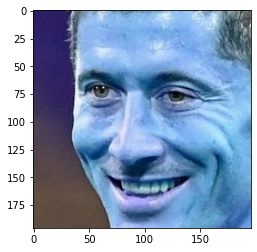

In [49]:
cropped_image = get_cropped_image_if_2_eyes(r"C:\Users\przem\Desktop\bayern_players_recognition\model\cropped\robert-lewandowski\robert-lewandowski8.jpg")
plt.imshow(cropped_image)

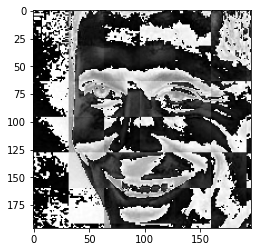

In [52]:
im_har = w2d(cropped_image, 'db1', 5)
plt.imshow(im_har, cmap='gray')